In [52]:
import matplotlib.pyplot as plt
import os

In [53]:
files = os.listdir('./data')
print(files)
data = {}

['train_losses_log.log', 'test_losses_log.log', 'metrics_log.log']


# Test data preprocessing

In [54]:
s = "epoch    0 steps   3001:{'total_loss': 1.7534202056,  'cos': 6.4647211953,  'mse': 1.4935205094,  'bce': 4.1817553732,  'dice': 1.9350215274,  'ssim': 0.8872955562,  'kl': 0.8161331372,  }"
s = s.split('steps')
steps = int(s[1].split(':')[0])
print(steps)
all_features = s[1].split('{')[1].split('}')[0].split(',')
test = {}
for feature in all_features[:-1]:
    # print(feature)
    name = feature.split(':')[0].strip().strip('\'') # 先刪掉頭尾空白, 再去刪掉頭尾單引號
    feature_data = float(feature.split(':')[1])
    # print(name)
    if name not in test:
        test[name] = []

    test[name].append(feature_data)
test

3001


{'total_loss': [1.7534202056],
 'cos': [6.4647211953],
 'mse': [1.4935205094],
 'bce': [4.1817553732],
 'dice': [1.9350215274],
 'ssim': [0.8872955562],
 'kl': [0.8161331372]}

In [55]:
t = '\'total_loss\''
t.strip("\'")

'total_loss'

# Data preprocessing

In [56]:
for file in files:
    filename = file.split('_')[0]
    # data[filename] = [] 本來要之後再處理數據, 但太麻煩, 直接用dict在這邊處理
    data[filename] = {}
    print(filename)
    with open (f'./data/{file}', 'r') as f:
        for line in f.readlines():
            # if line.count('epoch') == 0: 不能用epoch來判斷, 因為前面那行也有epoch, 用step比較保險
            if line.count('step') == 0:
                continue
            # data[filename].append(line) 
            pre_line = line.split('steps')
            steps = int(pre_line[1].split(':')[0])
            print(steps)
            if 'steps' not in data[filename]: # 避免沒有這個key in dict, 所以我做個判斷式來做創建
                data[filename]['steps'] = []
            data[filename]['steps'].append(steps)
            all_features = pre_line[1].split('{')[1].split('}')[0].split(',')
            for feature in all_features[:-1]:
                # print(feature)
                name = feature.split(':')[0].strip().strip('\'') # 先刪掉頭尾空白, 再去刪掉頭尾單引號
                feature_data = float(feature.split(':')[1])
                # print(name)
                if name not in data[filename]: # 避免沒有這個key in dict, 所以我做個判斷式來做創建
                    data[filename][name] = []

                data[filename][name].append(feature_data)
data


train
3001
6001
9001
12001
15001
18001
21850
24850
27850
30850
33850
36850
40699
43699
46699
49699
52699
55699
59548
62548
65548
68548
71548
74548
78397
81397
84397
87397
90397
93397
97246
100246
103246
106246
109246
112246
116095
119095
122095
125095
128095
131095
134944
137944
140944
143944
146944
149944
153793
156793
159793
162793
165793
168793
172642
175642
178642
181642
184642
187642
191491
194491
197491
200491
203491
206491
210340
213340
216340
219340
222340
225340
229189
232189
235189
238189
241189
244189
248038
251038
254038
257038
260038
263038
266887
269887
272887
275887
278887
281887
285736
288736
291736
294736
297736
test
3001
6001
9001
12001
15001
18001
21850
24850
27850
30850
33850
36850
40699
43699
46699
49699
52699
55699
59548
62548
65548
68548
71548
74548
78397
81397
84397
87397
90397
93397
97246
100246
103246
106246
109246
112246
116095
119095
122095
125095
128095
131095
134944
137944
140944
143944
146944
149944
153793
156793
159793
162793
165793
168793
172642
175642


{'train': {'steps': [3001,
   6001,
   9001,
   12001,
   15001,
   18001,
   21850,
   24850,
   27850,
   30850,
   33850,
   36850,
   40699,
   43699,
   46699,
   49699,
   52699,
   55699,
   59548,
   62548,
   65548,
   68548,
   71548,
   74548,
   78397,
   81397,
   84397,
   87397,
   90397,
   93397,
   97246,
   100246,
   103246,
   106246,
   109246,
   112246,
   116095,
   119095,
   122095,
   125095,
   128095,
   131095,
   134944,
   137944,
   140944,
   143944,
   146944,
   149944,
   153793,
   156793,
   159793,
   162793,
   165793,
   168793,
   172642,
   175642,
   178642,
   181642,
   184642,
   187642,
   191491,
   194491,
   197491,
   200491,
   203491,
   206491,
   210340,
   213340,
   216340,
   219340,
   222340,
   225340,
   229189,
   232189,
   235189,
   238189,
   241189,
   244189,
   248038,
   251038,
   254038,
   257038,
   260038,
   263038,
   266887,
   269887,
   272887,
   275887,
   278887,
   281887,
   285736,
   288736,
   2

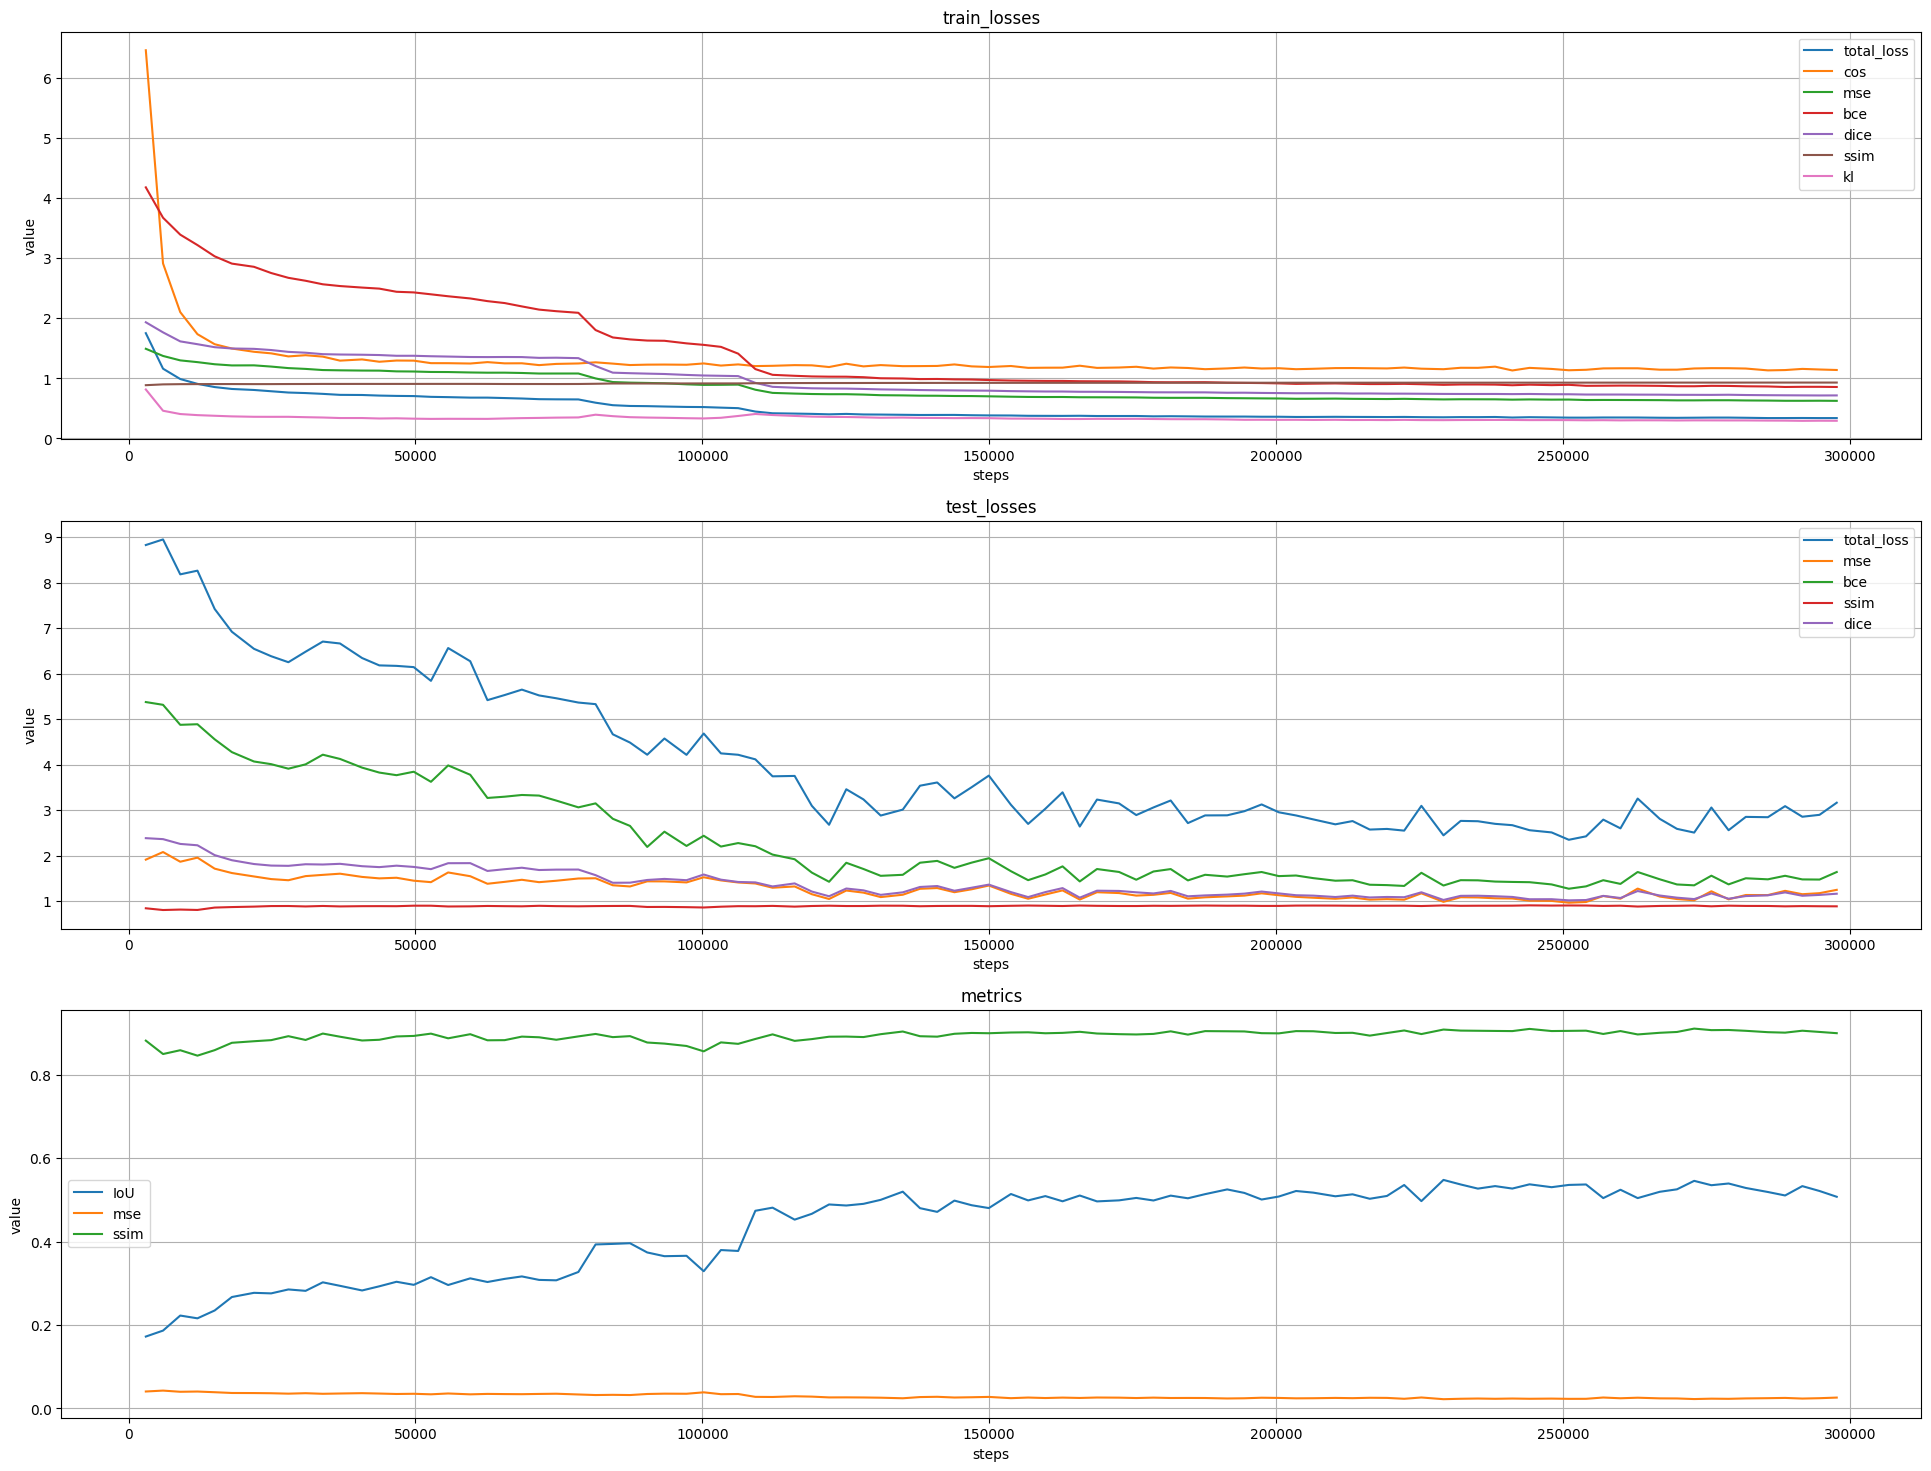

In [57]:
plt.figure(figsize=(24, 18)) # 設定圖片大小
for i,ele in enumerate(data):
    plt.subplot(len(data), 1, i+1) # 在圖片中切data長度的分塊, 利用 i 來做分塊.
    title = f'{ele}'
    if ele != 'metrics':
        title += '_losses'
    plt.title(f'{title}')
    for feature in data[ele].keys(): # 除了steps以外的feature, 每個都依據steps當x軸, 畫出來
        if feature == 'steps':
            continue
        plt.plot(data[ele]['steps'], data[ele][feature], label=feature)
    plt.grid() # 加上網格
    plt.legend() # 加上圖例
    plt.ylabel('value') # 設定y軸label
    plt.xlabel('steps') # 設定x軸label